In [1]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import re 

In [2]:
data=pd.read_csv("tripadvisor_hotel_reviews.csv")
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [3]:
data.Review[0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [4]:
data['lowercase_review']=data["Review"].str.lower()



In [5]:
data.head()

,Review,Rating,lowercase_review
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso..."


In [6]:
english_stopwords=set(stopwords.words("english"))
english_stopwords.remove('not')

data["no_stopwords"]=data["lowercase_review"].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))

In [7]:
data.head()

,Review,Rating,lowercase_review,no_stopwords
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso..."


In [8]:
data['review_no_stopwords_no_punct'] = data.apply(lambda x: re.sub(r"[*]", "star", x['no_stopwords'] ), axis=1)

In [9]:
data.head()

,Review,Rating,lowercase_review,no_stopwords,review_no_stopwords_no_punct
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4star experience hotel monaco s...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso..."


In [10]:
data['review_no_stopwords_no_punct'] = data. \
                                    apply(lambda x: \
                                    re.sub(r"([^\w\s])", \
                                    "", \
                                    x['review_no_stopwords_no_punct'] \
                                    ), axis=1)

In [11]:
data.head()

,Review,Rating,lowercase_review,no_stopwords,review_no_stopwords_no_punct
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4star experience hotel monaco s...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...


In [12]:
data["tokenized"]=data["review_no_stopwords_no_punct"].apply(lambda x: word_tokenize(x))

data.head()

,Review,Rating,lowercase_review,no_stopwords,review_no_stopwords_no_punct,tokenized
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4star experience hotel monaco s...,"[nice, rooms, not, 4star, experience, hotel, m..."
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game..."


In [13]:
stemmer=PorterStemmer()



data["Stemmed"]=data["tokenized"].apply(lambda x: [stemmer.stem(word) for word in x])



In [14]:
data["Stemmed"][10]

['poor',
 'valu',
 'stay',
 'monaco',
 'seattl',
 'juli',
 'nice',
 'hotel',
 'price',
 '100',
 '150',
 'night',
 'not',
 'hotel',
 'take',
 'beat',
 'quotient',
 'experi',
 'simpli',
 'averag',
 'noth',
 'except',
 'pay',
 '300',
 'nt',
 'ca',
 'nt',
 'terribl',
 'disappoint',
 'wife',
 'stay',
 'nicest',
 'suit',
 '200night',
 'felt',
 'like',
 'overpay',
 'best',
 'advic',
 'shop',
 'qualitywis',
 'leagu',
 'averag',
 'marriott',
 'nice',
 'best',
 'western']

In [15]:
lemmatizer=nltk.WordNetLemmatizer()

data["lemmatized"]=data["tokenized"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])



In [16]:
data["lemmatized"].head()

0    [nice, hotel, expensive, parking, got, good, d...
1    [ok, nothing, special, charge, diamond, member...
2    [nice, room, not, 4star, experience, hotel, mo...
3    [unique, great, stay, wonderful, time, hotel, ...
4    [great, stay, great, stay, went, seahawk, game...
Name: lemmatized, dtype: object

In [17]:
data.head()

,Review,Rating,lowercase_review,no_stopwords,review_no_stopwords_no_punct,tokenized,Stemmed,lemmatized
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s...","[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, noth, special, charg, diamond, member, hi...","[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4star experience hotel monaco s...,"[nice, rooms, not, 4star, experience, hotel, m...","[nice, room, not, 4star, experi, hotel, monaco...","[nice, room, not, 4star, experience, hotel, mo..."
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona...","[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."


In [18]:
tokens_clean = sum(data['lemmatized'], [])
print(tokens_clean)

['nice', 'hotel', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversary', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'review', 'valet', 'parking', 'check', 'quick', 'easy', 'little', 'disappointed', 'nonexistent', 'view', 'room', 'room', 'clean', 'nice', 'size', 'bed', 'comfortable', 'woke', 'stiff', 'neck', 'high', 'pillow', 'not', 'soundproof', 'like', 'heard', 'music', 'room', 'night', 'morning', 'loud', 'bang', 'door', 'opening', 'closing', 'hear', 'people', 'talking', 'hallway', 'maybe', 'noisy', 'neighbor', 'aveda', 'bath', 'product', 'nice', 'not', 'goldfish', 'stay', 'nice', 'touch', 'taken', 'advantage', 'staying', 'longer', 'location', 'great', 'walking', 'distance', 'shopping', 'overall', 'nice', 'experience', 'pay', '40', 'parking', 'night', 'ok', 'nothing', 'special', 'charge', 'diamond', 'member', 'hilton', 'decided', 'chain', 'shot', '20th', 'anniversary', 'seattle', 'start', 'booked', 'suite', 'paid', 'extra', 'website', 'descript

In [19]:
unigram= (
    pd.Series(nltk.ngrams(tokens_clean,1)).value_counts()
)

In [20]:
unigram

(hotel,)           292
(room,)            275
(great,)           126
(not,)             122
(stay,)             95
                  ... 
(singaporewe,)       1
(australian,)        1
(australiaour,)      1
(exception,)         1
(nightyou,)          1
Name: count, Length: 2589, dtype: int64

In [21]:
bigrams= pd.Series(nltk.ngrams(tokens_clean,2)).value_counts()

print(bigrams)

(great, location)          24
(space, needle)            21
(hotel, monaco)            16
(staff, friendly)          12
(pike, place)              12
                           ..
(looking, decorated)        1
(decorated, maintained)     1
(maintained, staff)         1
(professional, large)       1
(food, raffle)              1
Name: count, Length: 8263, dtype: int64


In [24]:
trigrams=pd.Series(nltk.ngrams(tokens_clean,3)).value_counts()
print(trigrams)

(pike, place, market)          8
(hotel, great, location)       5
(view, space, needle)          5
(room, king, bed)              4
(staff, friendly, helpful)     4
                              ..
(large, room, nice)            1
(room, nice, extra)            1
(nice, extra, bathroom)        1
(extra, bathroom, toiletry)    1
(hotel, expensive, parking)    1
Name: count, Length: 9288, dtype: int64


C:\Users\SuhasKP\AppData\Local\Temp\ipykernel_28148\552959774.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=series.values, y=series.index, palette=palette)


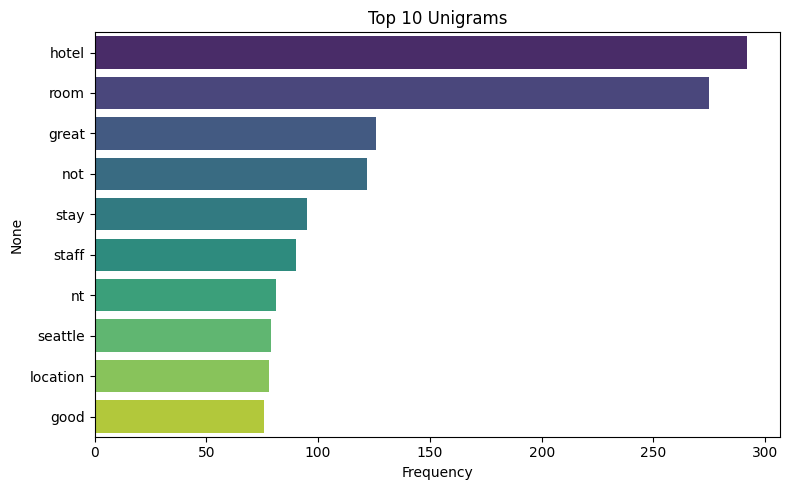

C:\Users\SuhasKP\AppData\Local\Temp\ipykernel_28148\552959774.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=series.values, y=series.index, palette=palette)


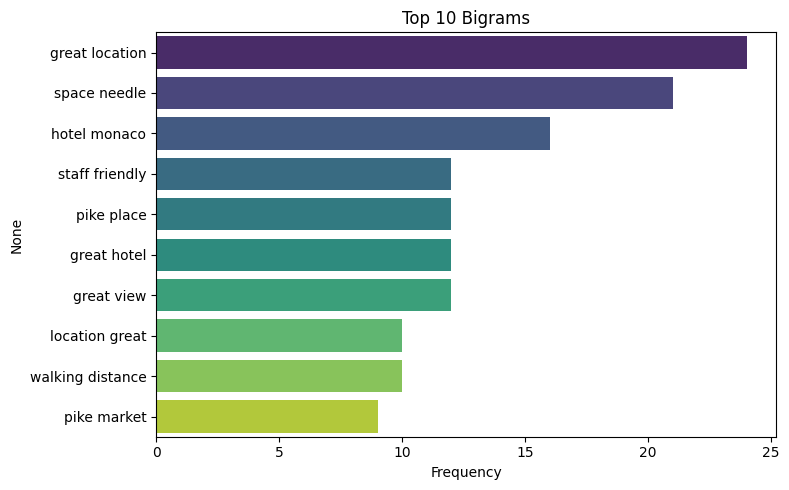

C:\Users\SuhasKP\AppData\Local\Temp\ipykernel_28148\552959774.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=series.values, y=series.index, palette=palette)


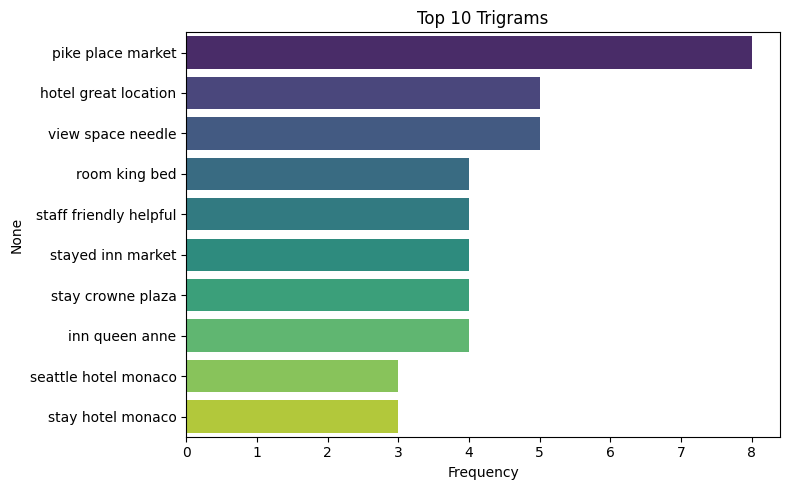

In [ ]:
# ...existing code...
import matplotlib.pyplot as plt

import seaborn as sns
from itertools import chain

# choose the token column you actually created earlier
tokens_col = 'lemmatized' if 'lemmatized' in data.columns else 'tokenized'

# Ensure each row is a list
data[tokens_col] = data[tokens_col].apply(lambda x: x if isinstance(x, list) else (str(x).split() if pd.notna(x) else []))

# Flatten tokens (corpus-wide contiguous n-grams)
tokens_clean = list(chain.from_iterable(data[tokens_col].tolist()))
# remove empty tokens if any
tokens_clean = [t for t in tokens_clean if t]

# Top 10 unigrams
unigrams = pd.Series(tokens_clean).value_counts().head(10)

# Top 10 bigrams and trigrams (convert tuple -> string)
bigrams = pd.Series(list(nltk.ngrams(tokens_clean, 2))).value_counts().head(10)
bigrams.index = [' '.join(t) for t in bigrams.index]

trigrams = pd.Series(list(nltk.ngrams(tokens_clean, 3))).value_counts().head(10)
trigrams.index = [' '.join(t) for t in trigrams.index]

# Plot helper
def plot_top(series, title, figsize=(8,5), palette='viridis'):
    plt.figure(figsize=figsize)
    sns.barplot(x=series.values, y=series.index, palette=palette)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.tight_layout()
    plt.show()


plot_top(unigrams, 'Top 10 Unigrams')
plot_top(bigrams, 'Top 10 Bigrams')
plot_top(trigrams, 'Top 10 Trigrams')
